In [106]:
# eda libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

! pip install statsmodels
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.formula.api as smf

In [7]:
res_eda_df = pd.read_csv("/Users/dima/code/Dimasaur/scorecast/data/restaurants_limited_features.csv")

/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_26786/134708132.py:1: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  res_eda_df = pd.read_csv("/Users/dima/code/Dimasaur/scorecast/data/restaurants_limited_features.csv")


In [8]:
print(res_eda_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52268 entries, 0 to 52267
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        52268 non-null  int64  
 1   index             52268 non-null  int64  
 2   business_id       52268 non-null  object 
 3   postal_code       52247 non-null  object 
 4   latitude          52268 non-null  float64
 5   longitude         52268 non-null  float64
 6   stars             52268 non-null  float64
 7   review_count      52268 non-null  int64  
 8   is_open           52268 non-null  int64  
 9   food_type         52268 non-null  object 
 10  delivery          49672 non-null  object 
 11  alcohol           52268 non-null  bool   
 12  bike_parking      52234 non-null  object 
 13  credit_card       52242 non-null  object 
 14  appointment_only  52267 non-null  object 
 15  caters            52221 non-null  object 
 16  coat_check        52266 non-null  object

In [129]:
print(f"Median score of the restaurants: {round(res_eda_df.stars.median(),2)}")
print(f"Mean score of the restaurants: {round(res_eda_df.stars.mean(),2)}")

Median score of the restaurants: 3.5
Mean score of the restaurants: 3.52


In [131]:
print(f"% of the most frequent score value, 4 stars: {(len(res_eda_df[res_eda_df['stars']==4]) / len(res_eda_df) * 100):.0f}%")

% of the most frequent score value, 4 stars: 26%


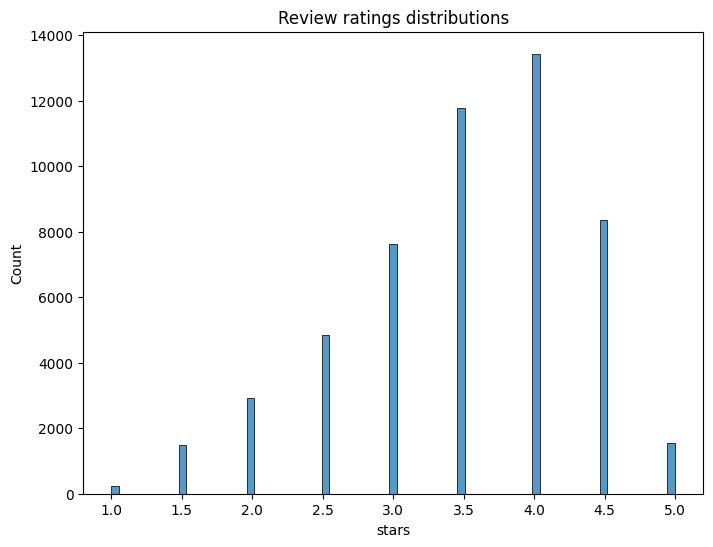

In [136]:
plt.figure(figsize=(8,6))
sns.histplot(res_eda_df.stars)
plt.title("Review ratings distributions")
plt.show();

In [9]:
print(res_eda_df.columns)

Index(['Unnamed: 0', 'index', 'business_id', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'food_type',
       'delivery', 'alcohol', 'bike_parking', 'credit_card',
       'appointment_only', 'caters', 'coat_check', 'dogs', 'drive_thru',
       'good_for_kids', 'good_for_groups', 'happy_hour', 'tv',
       'outdoor_seating', 'price_range', 'reservations', 'table_service',
       'take_out', 'wheelchair'],
      dtype='object')


(0.0, 1000.0)

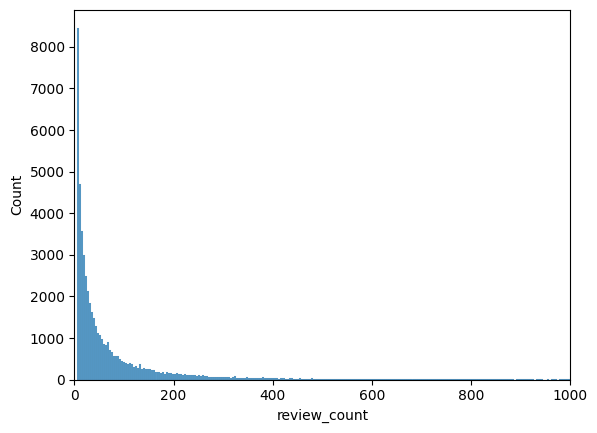

In [10]:
sns.histplot(res_eda_df.review_count)
plt.xlim(0,1000)

<Axes: xlabel='price_range', ylabel='Count'>

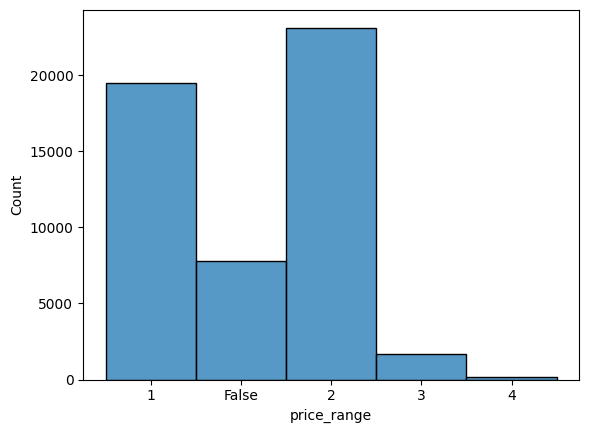

In [11]:
sns.histplot(res_eda_df.price_range)

<Axes: xlabel='is_open', ylabel='Count'>

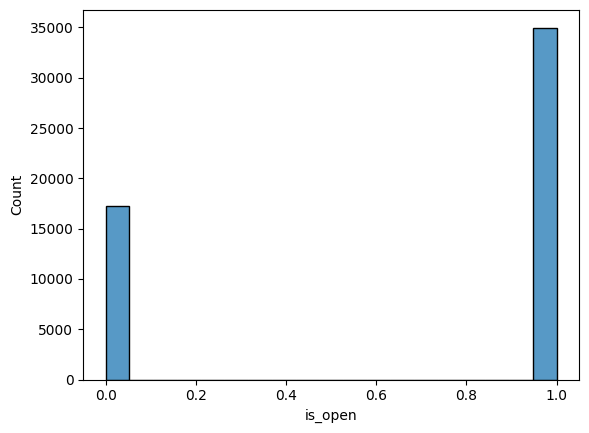

In [12]:
sns.histplot(res_eda_df.is_open)

In [13]:
res_eda_df.food_type.value_counts(normalize=True)

food_type
['O']                               0.624570
['Pizza']                           0.033768
['Mexican']                         0.027416
['Chinese']                         0.026020
['Burgers', 'Fast Food']            0.015937
                                      ...   
['Cafes', 'Salad']                  0.000019
['Local Flavor', 'Polish']          0.000019
['Cafes', 'Soup']                   0.000019
['Food', 'Salad']                   0.000019
['Indian', 'Tapas/Small Plates']    0.000019
Name: proportion, Length: 988, dtype: float64

<Axes: xlabel='happy_hour', ylabel='Count'>

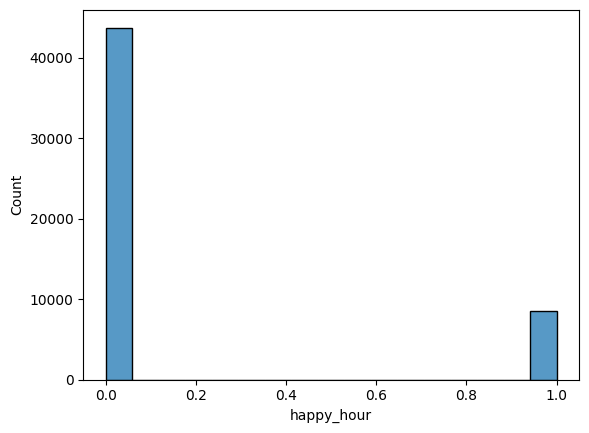

In [14]:
sns.histplot(res_eda_df.happy_hour)

In [142]:
res_eda_df.head()


,Unnamed: 0,index,business_id,postal_code,latitude,longitude,stars,review_count,is_open,food_type,...,good_for_kids,good_for_groups,happy_hour,tv,outdoor_seating,price_range,reservations,table_service,take_out,wheelchair
0,0,3,MTSW4McQd7CbVtyjqoe9mw,19107,39.955505,-75.155564,4.0,80,1,['O'],...,0,0,0,0,0,1,0,0,1,0
1,1,5,CF33F8-E6oudUQ46HnavjQ,37015,36.269593,-87.058943,2.0,6,1,['O'],...,1,1,0,1,1,1,0,0,1,1
2,2,8,k0hlBqXX-Bt0vf1op7Jr1w,63123,38.565165,-90.321087,3.0,19,0,['O'],...,1,1,0,1,1,1,0,0,1,0
3,3,9,bBDDEgkFA1Otx9Lfe7BZUQ,37207,36.208102,-86.768170,1.5,10,1,['O'],...,1,0,0,1,1,1,0,0,1,1
4,4,11,eEOYSgkmpB90uNA7lDOMRA,33602,27.955269,-82.456320,4.0,10,1,['O'],...,0,0,0,0,0,False,0,0,0,0


In [16]:
features_to_encode = ['good_for_kids','good_for_groups','happy_hour','tv','outdoor_seating','reservations','table_service','take_out', 'wheelchair']

# Step 1: Fill NaN values with the mode for each feature
for feature in features_to_encode:
    # Calculate the mode of the column
    mode_value = res_eda_df[feature].mode()[0]

    # Fill NaN values with the mode
    res_eda_df[feature].fillna(mode_value, inplace=True)

res_eda_df[features_to_encode] = res_eda_df[features_to_encode].astype(int)

/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_26786/1928850321.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  res_eda_df[feature].fillna(mode_value, inplace=True)
/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_26786/1928850321.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res

In [17]:
res_eda_df_drop_pr = res_eda_df[res_eda_df['price_range'] != 'False']
res_eda_df_drop_pr.shape

(44500, 29)

In [140]:
res_eda_df_drop_pr.columns

Index(['Unnamed: 0', 'index', 'business_id', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'food_type',
       'delivery', 'alcohol', 'bike_parking', 'credit_card',
       'appointment_only', 'caters', 'coat_check', 'dogs', 'drive_thru',
       'good_for_kids', 'good_for_groups', 'happy_hour', 'tv',
       'outdoor_seating', 'price_range', 'reservations', 'table_service',
       'take_out', 'wheelchair'],
      dtype='object')

In [20]:
corr_features = res_eda_df_drop_pr.drop(columns=['Unnamed: 0', 'index', 'business_id', 'postal_code', 'latitude',
       'longitude','food_type'])

In [56]:
corr_features_cleaned = corr_features.dropna(how='any')

<Axes: >

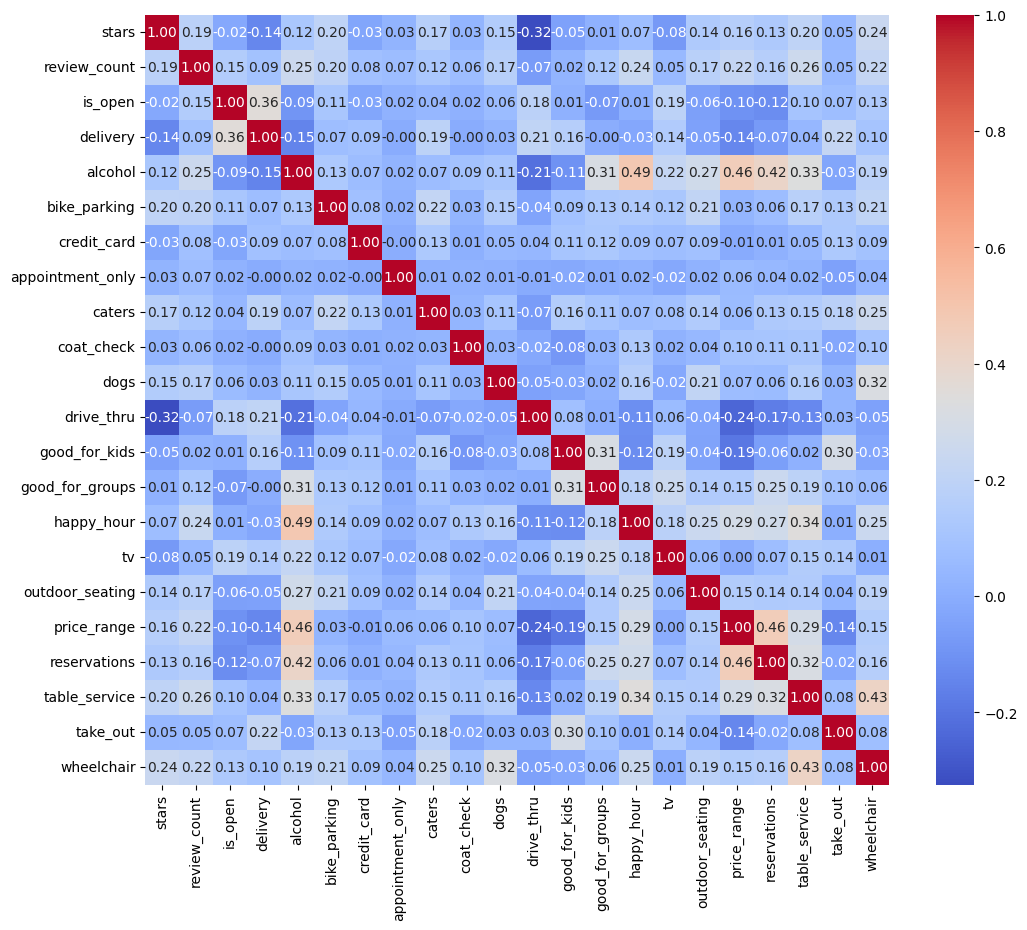

In [57]:
correlation_matrix = corr_features_cleaned.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


In [54]:
#X.delivery.isna().sum()
# X.bike_parking.isna().sum()
# X.credit_card.isna().sum()
#X.appointment_only.isna().sum()
#X.caters.isna().sum()
# X.coat_check.isna().sum()
# X.dogs.isna().sum()
# X.drive_thru.isna().sum()
# X.price_range.isna().sum()

np.int64(0)

In [32]:
X.columns

Index(['review_count', 'is_open', 'delivery', 'alcohol', 'bike_parking',
       'credit_card', 'appointment_only', 'caters', 'coat_check', 'dogs',
       'drive_thru', 'good_for_kids', 'good_for_groups', 'happy_hour', 'tv',
       'outdoor_seating', 'price_range', 'reservations', 'table_service',
       'take_out', 'wheelchair'],
      dtype='object')

In [58]:
X = corr_features_cleaned.drop(columns=['stars'])
y = corr_features_cleaned['stars']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5033194423754312
R-squared: 0.22243286966930864


### Regression with regularization - Lasso and Ridge

In [85]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

grid_search_l = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search_l.fit(X_train, y_train)

best_lasso_model = grid_search_l.best_estimator_

y_pred_l = best_lasso_model.predict(X_test)

mse_l = mean_squared_error(y_test, y_pred_l)
r2_l = r2_score(y_test, y_pred_l)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.512358698028774
R-squared: 0.2084683225309678


In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search_ridge.fit(X_train, y_train)

best_ridge_model = grid_search_ridge.best_estimator_

y_pred_r = best_ridge_model.predict(X_test)

mse_r = mean_squared_error(y_test, y_pred_r)
r2_r = r2_score(y_test, y_pred_r)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5032567098733745
R-squared: 0.22252978373122645


### Re-running using smf.ols

In [139]:
corr_features_cleaned.columns

Index(['stars', 'review_count', 'is_open', 'delivery', 'alcohol',
       'bike_parking', 'credit_card', 'appointment_only', 'caters',
       'coat_check', 'dogs', 'drive_thru', 'good_for_kids', 'good_for_groups',
       'happy_hour', 'tv', 'outdoor_seating', 'price_range', 'reservations',
       'table_service', 'take_out', 'wheelchair'],
      dtype='object')

In [103]:
formula = " + ".join(corr_features_cleaned.drop(columns='stars').columns)
print(formula)

review_count + is_open + delivery + alcohol + bike_parking + credit_card + appointment_only + caters + coat_check + dogs + drive_thru + good_for_kids + good_for_groups + happy_hour + tv + outdoor_seating + price_range + reservations + table_service + take_out + wheelchair


In [107]:
lin_model_ols = smf.ols(formula = f"stars ~ {formula}",data=corr_features_cleaned).fit()

In [108]:
lin_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     553.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:29:15   Log-Likelihood:                -45182.
No. Observations:               42073   AIC:                         9.041e+04
Df Residuals:                   42049   BIC:                         9.062e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.3781      0.018    191.385      0.000       3.343       3.413
delivery[T.True]            -0.2330      0.008    -29.281      0.000      -0.249      -0.217
alcohol[T.True]             -0.0680      0.010     -7.093      0.000      -0.087      -0.049
bike_parking[T.True]         0.1935      0.007     25.815      0.000       0.179       0.208
credit_card[T.True]         -0.1409      0.012    -11.603      0.000      -0.165      -0.117
appointment_only[T.True]     0.0511      0.073      0.698      0.485      -0.092       0.195
caters[T.True]               0.1605      0.008     20.871      0.000       0.145       0.176
coat_check[T.True]          -0.0818      0.044     -1.864      0.062      -0.168       0.004
dogs[T.True]                 0.1557      0.017      9.060      0.000       0.122       0.189
drive_thru[T.True]          -0.8020      0.014    -56.743      0.000      -0.830      -0.774
price_range[T.2]             0.0419      0.009      4.896      0.000       0.025       0.059
price_range[T.3]             0.1184      0.021      5.569      0.000       0.077       0.160
price_range[T.4]             0.1393      0.054      2.559      0.011       0.033       0.246
review_count                 0.0005   2.12e-05     21.375      0.000       0.000       0.000
is_open                      0.0529      0.008      6.436      0.000       0.037       0.069
good_for_kids               -0.0477      0.010     -5.019      0.000      -0.066      -0.029
good_for_groups             -0.0179      0.010     -1.849      0.064      -0.037       0.001
happy_hour                  -0.1447      0.011    -12.932      0.000      -0.167      -0.123
tv                          -0.1077      0.008    -13.273      0.000      -0.124      -0.092
outdoor_seating              0.0882      0.008     11.441      0.000       0.073       0.103
reservations                 0.0273      0.009      2.989      0.003       0.009       0.045
table_service                0.1353      0.010     13.787      0.000       0.116       0.155
take_out                     0.1589      0.014     11.580      0.000       0.132       0.186
wheelchair                   0.2575      0.010     25.968      0.000       0.238       0.277
==============================================================================
Omnibus:                      712.168   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.748
Skew:                          -0.327   Prob(JB):                    2.58e-163
Kurtosis:                       2.984   Cond. No.                     4.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

### Merging the table for getting the stats about the city ###

In [145]:
restaurants_ohe = pd.read_csv("/Users/dima/code/Dimasaur/scorecast/data/restaurants_ohe.csv")

In [154]:
restaurants_ohe.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'food_type_one',
       'food_type_one_American', 'food_type_one_Barbeque',
       'food_type_one_Burgers', 'food_type_one_Cafes',
       'food_type_one_Cajun/Creole', 'food_type_one_Chicken Wings',
       'food_type_one_Chinese', 'food_type_one_Delis', 'food_type_one_Diners',
       'food_type_one_Greek', 'food_type_one_Indian', 'food_type_one_Italian',
       'food_type_one_Japanese', 'food_type_one_Mexican',
       'food_type_one_Sandwiches', 'food_type_one_Seafood',
       'food_type_one_Steakhouses', 'food_type_one_Thai',
       'food_type_one_Vietnamese', 'food_type_one_None'],
      dtype='object')

In [158]:
res_eda_df_full = pd.merge(res_eda_df,restaurants_ohe[['city','state']],on=res_eda_df.business_id, how='left')

In [159]:
res_eda_df_full.columns

Index(['key_0', 'Unnamed: 0', 'index', 'business_id', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'food_type', 'delivery', 'alcohol', 'bike_parking', 'credit_card',
       'appointment_only', 'caters', 'coat_check', 'dogs', 'drive_thru',
       'good_for_kids', 'good_for_groups', 'happy_hour', 'tv',
       'outdoor_seating', 'price_range', 'reservations', 'table_service',
       'take_out', 'wheelchair', 'city', 'state'],
      dtype='object')

In [162]:
res_eda_df_full.to_csv("/Users/dima/code/Dimasaur/scorecast/frontend/stats/restaurant_eda_df_full.csv")